In [37]:
from main import *

## Gun Modelv2 non sym

OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_5_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_5_POD_13_1e-6/Data/
6
R [-5.93771452e-06 -3.39115322e-07 -3.72400256e-07] [[-9.99999905e-01 -3.79280511e-04  2.15171424e-04]
 [-2.10912150e-04 -1.11943710e-02 -9.99937319e-01]
 [-3.81665446e-04  9.99937269e-01 -1.11942899e-02]] 1
Rtilde [0.00205473 0.00052544 0.00046637] [[ 9.99999765e-01  5.39507143e-04 -4.24153197e-04]
 [ 5.41416678e-04 -9.99989661e-01  4.51484277e-03]
 [ 4.21713022e-04  4.51507135e-03  9.99989718e-01]] 1
I [9.46313993e-05 1.36060711e-05 1.00910067e-05] [[ 9.99999586e-01  7.87747674e-04 -4.56519075e-04]
 [ 7.80549365e-04 -9.99878645e-01 -1.55591203e-02]
 [ 4.68720335e-04 -1.55587575e-02  9.99878845e-01]] 1
7
R [-8.20900430e-06 -4.69267545e-07 -5.15355684e-07] [[-9.99999904e-01 -3.79306407e-04  2.17226848e-04]
 [-2.12966004e-04 -1.11973862e-0

/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


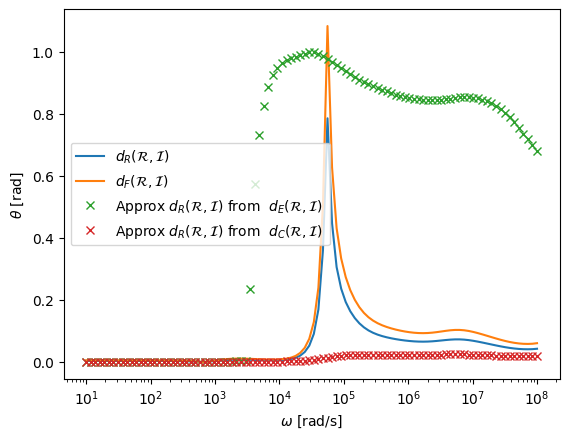

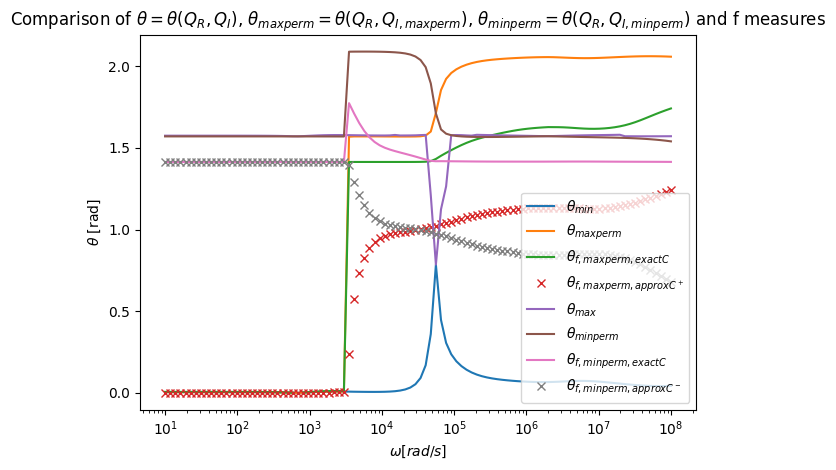

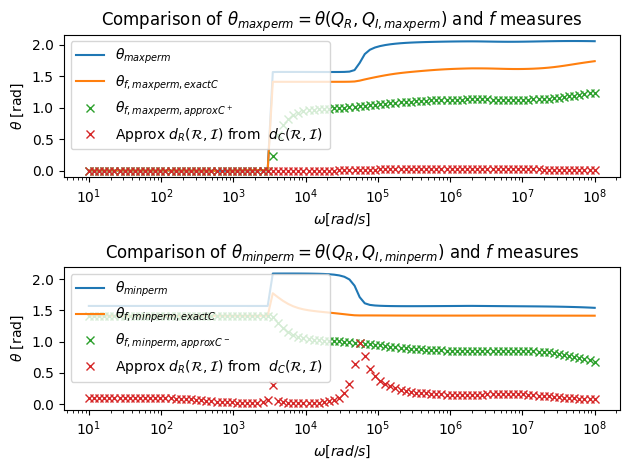

6 1.0
[0.00205473 0.00052544 0.00046637] [1.36060711e-05 9.46313993e-05 1.00910067e-05]
[[ 9.99999765e-01  5.39507143e-04 -4.24153197e-04]
 [ 5.41416678e-04 -9.99989661e-01  4.51484277e-03]
 [ 4.21713022e-04  4.51507135e-03  9.99989718e-01]] [[-7.87747674e-04  9.99999586e-01 -4.56519075e-04]
 [ 9.99878645e-01  7.80549365e-04 -1.55591203e-02]
 [ 1.55587575e-02  4.68720335e-04  9.99878845e-01]]
0.020075722654302054 1.5711364477616334
0.02839135925215477 2.0003400920445293
7 1.0
[0.0005253  0.00205246 0.00046624] [1.11185787e-04 1.60049147e-05 1.18685957e-05]
[[ 5.39955700e-04  9.99999764e-01 -4.24210780e-04]
 [-9.99989646e-01  5.41866928e-04  4.51825054e-03]
 [ 4.51847934e-03  4.21766733e-04  9.99989703e-01]] [[ 9.99999584e-01 -7.89728844e-04 -4.56692150e-04]
 [ 7.82527036e-04  9.99878625e-01 -1.55603290e-02]
 [ 4.68925159e-04  1.55599651e-02  9.99878826e-01]]
0.020080357204136454 1.5711380222045621
0.028397913495386066 2.0003416662190645
Computing F measure Tilde


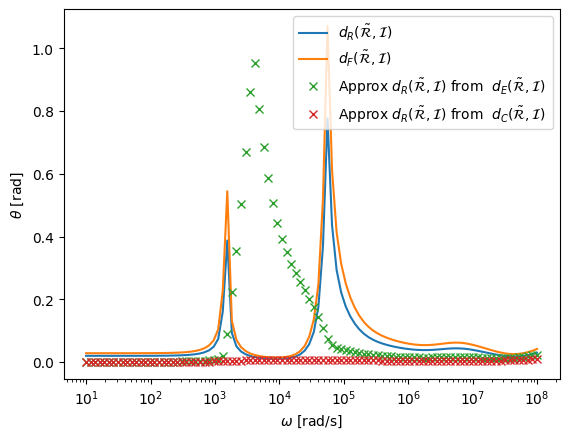

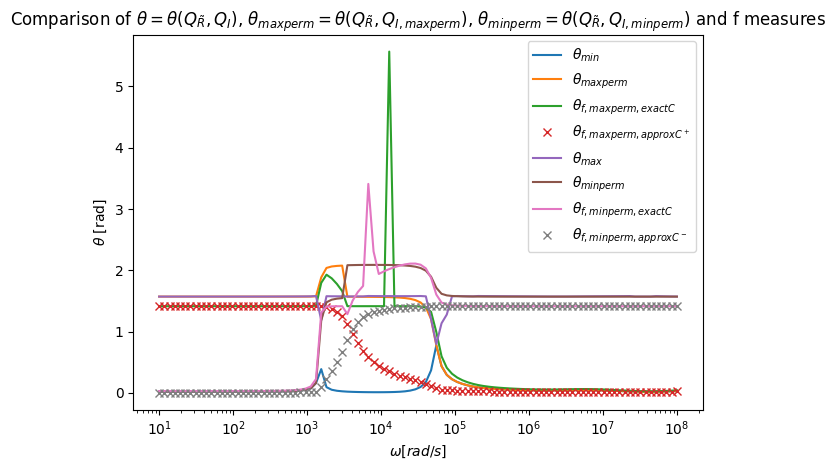

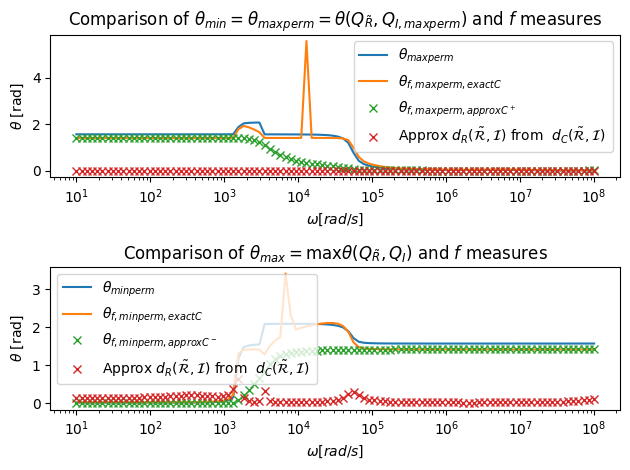

6 1.0
[0.00206067 0.00052582 0.00046671] [1.36060711e-05 9.46313993e-05 1.00910067e-05]
[[ 9.99999765e-01  5.38313176e-04 -4.24002640e-04]
 [ 5.40218314e-04 -9.99989702e-01  4.50599647e-03]
 [ 4.21572637e-04  4.50622446e-03  9.99989758e-01]] [[-7.87747674e-04  9.99999586e-01 -4.56519075e-04]
 [ 9.99878645e-01  7.80549365e-04 -1.55591203e-02]
 [ 1.55587575e-02  4.68720335e-04  9.99878845e-01]]
0.02006689193070236 1.5711375582692368
0.028378870723074507 2.0003412023629545
7 1.0
[0.00052582 0.00206067 0.00046671] [1.11185787e-04 1.60049147e-05 1.18685957e-05]
[[ 5.38313176e-04  9.99999765e-01 -4.24002640e-04]
 [-9.99989702e-01  5.40218314e-04  4.50599647e-03]
 [ 4.50622446e-03  4.21572637e-04  9.99989758e-01]] [[ 9.99999584e-01 -7.89728844e-04 -4.56692150e-04]
 [ 7.82527036e-04  9.99878625e-01 -1.55603290e-02]
 [ 4.68925159e-04  1.55599651e-02  9.99878826e-01]]
0.020068124736822054 1.5711395491003077
0.028380614174208754 2.0003431928533386


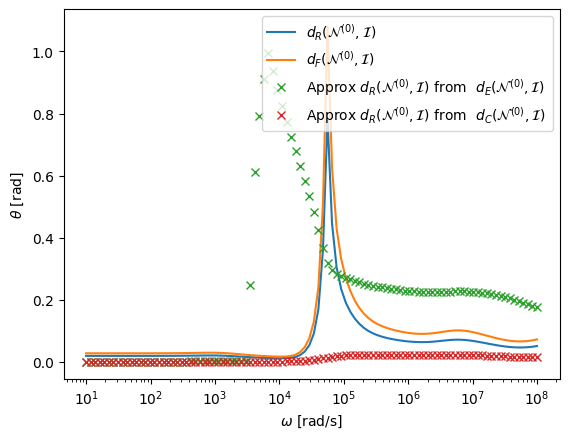

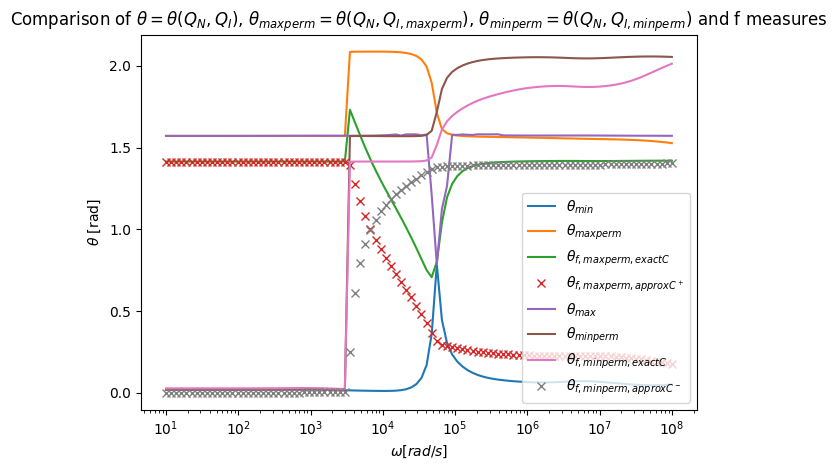

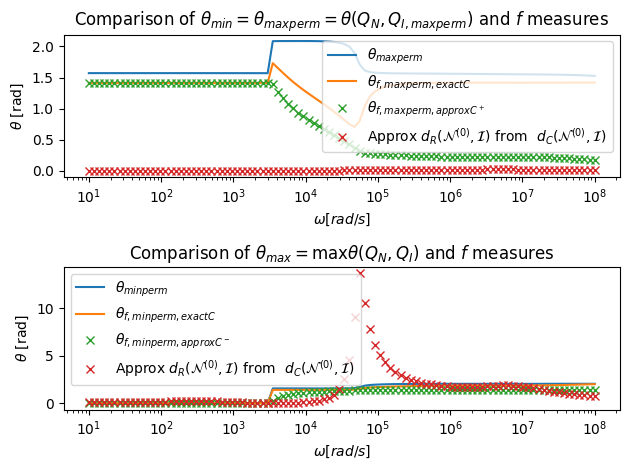

In [54]:

#DirList=["OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#    "OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2_nonsym_al/al_0.01_mu_1,1_sig_3.5e7,3.5e7/1e1-1e8_40_el_26657_ord_2_POD_13_1e-6/Data/"]

SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
p=5
mu=20

directory="OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
print(directory)
RIResults,RtildeIResults, N0IResults=main(directory,MaxOmega,Figures="On")    
SaveRIList=[]
SaveRtilde=[]



dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min'])


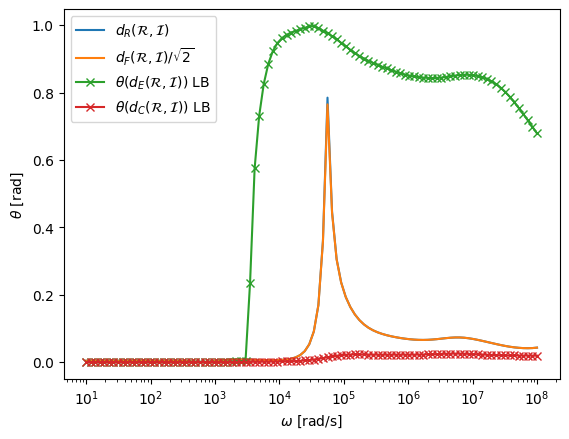

In [55]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

#AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"]))
#AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

#AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

#AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

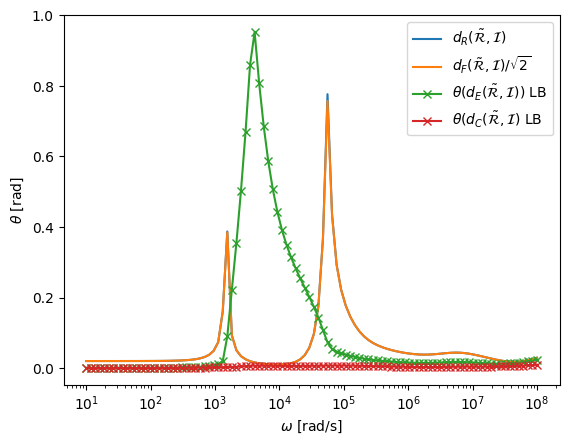

In [56]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

#AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

#AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

#AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

#AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

#AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


#AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

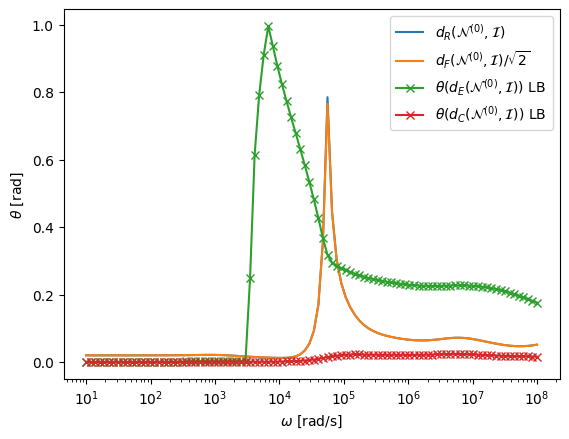

In [57]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

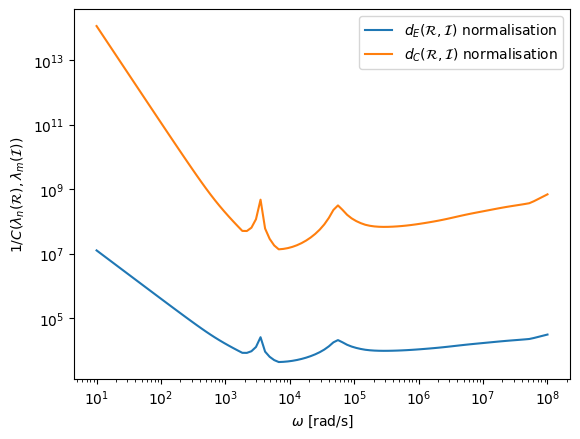

In [58]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

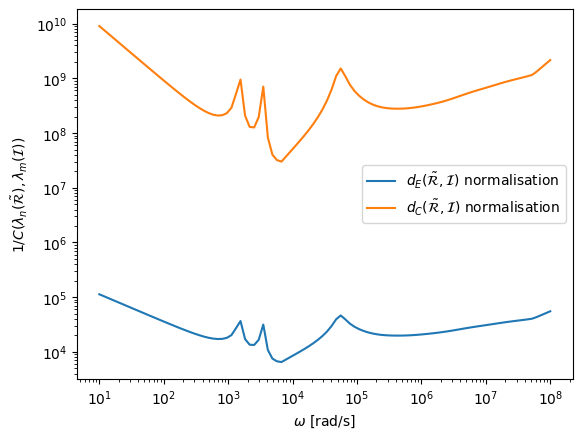

In [59]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_Rtilde0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

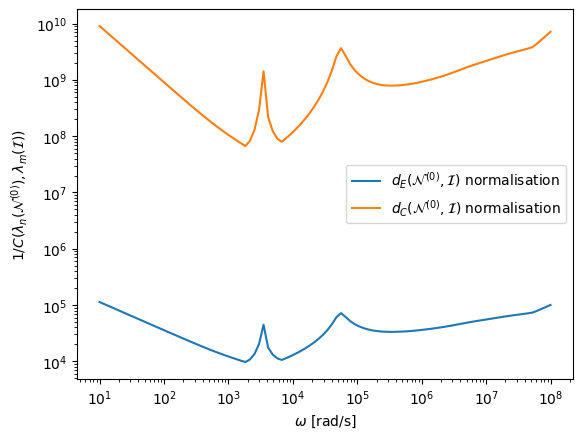

In [60]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()